In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt


**Data Description**
The data we are using for Stat analysis is the auto mpg dataset taken from UCI repository.

Information regarding data
    Title: Auto-Mpg Data
    Number of Instances: 398
    Number of Attributes: 9 including the class attribute
    Attribute Information: 
    1. mpg: continuous 2. cylinders: multi-valued discrete 3. displacement: continuous 4. horsepower: continuous 5. weight: continuous 6. acceleration: continuous 7. model year: multi-valued discrete 8. origin: multi-valued discrete 9. car name: string (unique for each instance)

All the attributes are self-explanatory.
This data is not complex and is good for analysis as it has a nice blend of both categorical and numerical attributes

**Statistical Analysis**

Preprocess the data.
Tests for independence between two categorical attributes
Normality Test for numeric attributes
Correlation between numeric attributes
Parametric and Non-Parametric test for samples

In [2]:
import itertools
import pandas as pd
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection

import seaborn as sns
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot

sns.set()

In [3]:
df = pd.read_csv(r"C:\Users\bmthm\Downloads\mpg_raw.csv")
print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      

In [4]:
pd.DataFrame(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [5]:
df.shape

(398, 9)

In [6]:
##the data is in rectangular form with 398 entries each having 9 distinct properties

In [7]:
columns = list(df.columns)
columns

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin',
 'name']

In [8]:
#describe the properties of this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
cats = list(df.select_dtypes(include = ['object']).columns)
nums = list(df.select_dtypes(exclude = ['object']).columns)

In [10]:
cats

['origin', 'name']

In [11]:
nums

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year']

In [12]:
#Check for nan value
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [13]:
#Check for null value
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [14]:
df[df.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [15]:
df.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.00,398.00,398.00,392.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.47,2970.42,15.57,76.01
std,7.82,1.70,104.27,38.49,846.84,2.76,3.70
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
25%,17.50,4.00,104.25,75.00,2223.75,13.82,73.00
50%,23.00,4.00,148.50,93.50,2803.50,15.50,76.00
75%,29.00,8.00,262.00,126.00,3608.00,17.18,79.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


In [16]:
df.mpg.unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [17]:
df.cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [18]:
df.displacement.unique()

array([307. , 350. , 318. , 304. , 302. , 429. , 454. , 440. , 455. ,
       390. , 383. , 340. , 400. , 113. , 198. , 199. , 200. ,  97. ,
       110. , 107. , 104. , 121. , 360. , 140. ,  98. , 232. , 225. ,
       250. , 351. , 258. , 122. , 116. ,  79. ,  88. ,  71. ,  72. ,
        91. ,  97.5,  70. , 120. ,  96. , 108. , 155. ,  68. , 114. ,
       156. ,  76. ,  83. ,  90. , 231. , 262. , 134. , 119. , 171. ,
       115. , 101. , 305. ,  85. , 130. , 168. , 111. , 260. , 151. ,
       146. ,  80. ,  78. , 105. , 131. , 163. ,  89. , 267. ,  86. ,
       183. , 141. , 173. , 135. ,  81. , 100. , 145. , 112. , 181. ,
       144. ])

In [19]:
df.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [20]:
df.weight.unique()

array([3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850, 3563,
       3609, 3761, 3086, 2372, 2833, 2774, 2587, 2130, 1835, 2672, 2430,
       2375, 2234, 2648, 4615, 4376, 4382, 4732, 2264, 2228, 2046, 2634,
       3439, 3329, 3302, 3288, 4209, 4464, 4154, 4096, 4955, 4746, 5140,
       2962, 2408, 3282, 3139, 2220, 2123, 2074, 2065, 1773, 1613, 1834,
       1955, 2278, 2126, 2254, 2226, 4274, 4385, 4135, 4129, 3672, 4633,
       4502, 4456, 4422, 2330, 3892, 4098, 4294, 4077, 2933, 2511, 2979,
       2189, 2395, 2288, 2506, 2164, 2100, 4100, 3988, 4042, 3777, 4952,
       4363, 4237, 4735, 4951, 3821, 3121, 3278, 2945, 3021, 2904, 1950,
       4997, 4906, 4654, 4499, 2789, 2279, 2401, 2379, 2124, 2310, 2472,
       2265, 4082, 4278, 1867, 2158, 2582, 2868, 3399, 2660, 2807, 3664,
       3102, 2875, 2901, 3336, 2451, 1836, 2542, 3781, 3632, 3613, 4141,
       4699, 4457, 4638, 4257, 2219, 1963, 2300, 1649, 2003, 2125, 2108,
       2246, 2489, 2391, 2000, 3264, 3459, 3432, 31

In [21]:
df.acceleration.unique()

array([12. , 11.5, 11. , 10.5, 10. ,  9. ,  8.5,  8. ,  9.5, 15. , 15.5,
       16. , 14.5, 20.5, 17.5, 12.5, 14. , 13.5, 18.5, 19. , 13. , 19.5,
       18. , 17. , 23.5, 16.5, 21. , 16.9, 14.9, 17.7, 15.3, 13.9, 12.8,
       15.4, 17.6, 22.2, 22.1, 14.2, 17.4, 16.2, 17.8, 12.2, 16.4, 13.6,
       15.7, 13.2, 21.9, 16.7, 12.1, 14.8, 18.6, 16.8, 13.7, 11.1, 11.4,
       18.2, 15.8, 15.9, 14.1, 21.5, 14.4, 19.4, 19.2, 17.2, 18.7, 15.1,
       13.4, 11.2, 14.7, 16.6, 17.3, 15.2, 14.3, 20.1, 24.8, 11.3, 12.9,
       18.8, 18.1, 17.9, 21.7, 23.7, 19.9, 21.8, 13.8, 12.6, 16.1, 20.7,
       18.3, 20.4, 19.6, 17.1, 15.6, 24.6, 11.6])

In [22]:
df.model_year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [23]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [24]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [25]:
6 / len(df)

0.01507537688442211

In [26]:
miss_val_df = df.isnull().sum()
miss_val_percent_df = 100 * df.isnull().sum() /len(df)
miss_val_table_df = pd.concat([miss_val_df,miss_val_percent_df],axis = 1)
miss_val_table_df = miss_val_table_df.rename(columns = {0 : 'Missing Values count', 1 : '% of Total Values'})
miss_val_table_df.sort_values("Missing Values count").round(2)

,Missing Values count,% of Total Values
mpg,0,0.00
cylinders,0,0.00
displacement,0,0.00
weight,0,0.00
acceleration,0,0.00
model_year,0,0.00
origin,0,0.00
name,0,0.00
horsepower,6,1.51


In [27]:
# Missing value imputation by mean

missing_col = ['horsepower']

for i in missing_col:
    df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

In [28]:
miss_val_df = df.isnull().sum()
miss_val_percent_df = 100 * df.isnull().sum() /len(df)
miss_val_table_df = pd.concat([miss_val_df,miss_val_percent_df],axis = 1)
miss_val_table_df = miss_val_table_df.rename(columns = {0 : 'Missing Values count', 1 : '% of Total Values'})
miss_val_table_df.sort_values("Missing Values count").round(2)

,Missing Values count,% of Total Values
mpg,0,0.0
cylinders,0,0.0
displacement,0,0.0
horsepower,0,0.0
weight,0,0.0
acceleration,0,0.0
model_year,0,0.0
origin,0,0.0
name,0,0.0


In [29]:
df.duplicated().sum()

0

In [30]:
df.shape

(398, 9)

In [31]:
# remove extra spaces if any
for col in ['origin', 'name']:
    df[col] = df[col].apply(lambda x: ' '.join(x.split()))

In [32]:
df[cats]

,origin,name
0,usa,chevrolet chevelle malibu
1,usa,buick skylark 320
2,usa,plymouth satellite
3,usa,amc rebel sst
4,usa,ford torino
...,...,...
393,usa,ford mustang gl
394,europe,vw pickup
395,usa,dodge rampage
396,usa,ford ranger


In [33]:
df[nums]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [34]:
df['mpg_level'] = df['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
cats.append('mpg_level')
print(f'categorical variables:  {cats}')

categorical variables:  ['origin', 'name', 'mpg_level']


In [35]:
# before we move ahead it's a good practice to group all variables together having same type.
df = pd.concat((df[cats], df[nums]), axis=1)
df.head()

,origin,name,mpg_level,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,usa,chevrolet chevelle malibu,medium,18.0,8,307.0,130.0,3504,12.0,70
1,usa,buick skylark 320,low,15.0,8,350.0,165.0,3693,11.5,70
2,usa,plymouth satellite,medium,18.0,8,318.0,150.0,3436,11.0,70
3,usa,amc rebel sst,low,16.0,8,304.0,150.0,3433,12.0,70
4,usa,ford torino,medium,17.0,8,302.0,140.0,3449,10.5,70


In [36]:
df_cats= df[cats]
df_cats

,origin,name,mpg_level
0,usa,chevrolet chevelle malibu,medium
1,usa,buick skylark 320,low
2,usa,plymouth satellite,medium
3,usa,amc rebel sst,low
4,usa,ford torino,medium
...,...,...,...
393,usa,ford mustang gl,medium
394,europe,vw pickup,high
395,usa,dodge rampage,high
396,usa,ford ranger,medium


In [37]:
df_nums= df[nums]
df_nums

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


**Distribution check**

C:\Users\bmthm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bmthm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


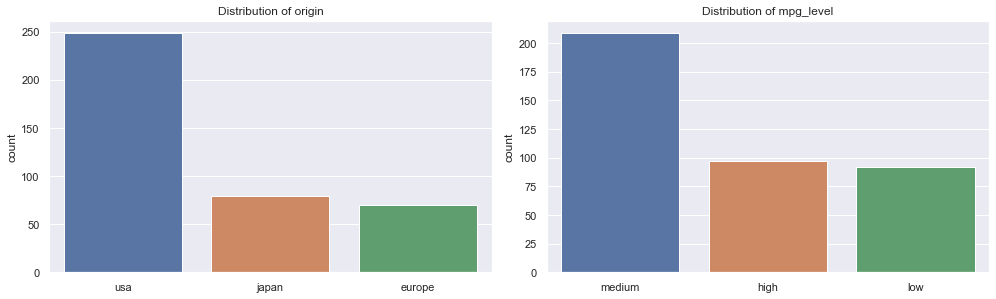

In [43]:
fig = plt.figure(1, (14, 8))

for i,cat in enumerate(df_cats.drop(['name'], axis=1).columns):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(df_cats[cat], order=df_cats[cat].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()

plt.show()

In [39]:
df.origin.value_counts()

num_rows, num_cols = df.shape

origin_perc = df.origin.value_counts()/ num_rows
origin_perc.round(2)

usa       0.63
japan     0.20
europe    0.18
Name: origin, dtype: float64

In [44]:
for i,cat in enumerate(df_cats.drop(['name'], axis=1).columns):
    val_counts = df_cats[cat].value_counts()
    dominant_frac = val_counts.iloc[0] / num_rows
    print(f'`{val_counts.index[0]}` alone contributes to {round(dominant_frac * 100, 2)}% of {cat}')

`usa` alone contributes to 62.56% of origin
`medium` alone contributes to 52.51% of mpg_level


In [45]:
df_cats

,origin,name,mpg_level
0,usa,chevrolet chevelle malibu,medium
1,usa,buick skylark 320,low
2,usa,plymouth satellite,medium
3,usa,amc rebel sst,low
4,usa,ford torino,medium
...,...,...,...
393,usa,ford mustang gl,medium
394,europe,vw pickup,high
395,usa,dodge rampage,high
396,usa,ford ranger,medium


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   origin        398 non-null    object 
 1   name          398 non-null    object 
 2   mpg_level     398 non-null    object 
 3   mpg           398 non-null    float64
 4   cylinders     398 non-null    int64  
 5   displacement  398 non-null    float64
 6   horsepower    398 non-null    float64
 7   weight        398 non-null    int64  
 8   acceleration  398 non-null    float64
 9   model_year    398 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 31.2+ KB


In [47]:
df.head()

,origin,name,mpg_level,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,usa,chevrolet chevelle malibu,medium,18.0,8,307.0,130.0,3504,12.0,70
1,usa,buick skylark 320,low,15.0,8,350.0,165.0,3693,11.5,70
2,usa,plymouth satellite,medium,18.0,8,318.0,150.0,3436,11.0,70
3,usa,amc rebel sst,low,16.0,8,304.0,150.0,3433,12.0,70
4,usa,ford torino,medium,17.0,8,302.0,140.0,3449,10.5,70


In [49]:
df_cats

,origin,name,mpg_level
0,usa,chevrolet chevelle malibu,medium
1,usa,buick skylark 320,low
2,usa,plymouth satellite,medium
3,usa,amc rebel sst,low
4,usa,ford torino,medium
...,...,...,...
393,usa,ford mustang gl,medium
394,europe,vw pickup,high
395,usa,dodge rampage,high
396,usa,ford ranger,medium


In [50]:
df_cats['car_company'] = df_cats['name'].apply(lambda x: x.split()[0])

C:\Users\bmthm\AppData\Local\Temp\ipykernel_128096\1388777144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cats['car_company'] = df_cats['name'].apply(lambda x: x.split()[0])


In [51]:
df_cats

,origin,name,mpg_level,car_company
0,usa,chevrolet chevelle malibu,medium,chevrolet
1,usa,buick skylark 320,low,buick
2,usa,plymouth satellite,medium,plymouth
3,usa,amc rebel sst,low,amc
4,usa,ford torino,medium,ford
...,...,...,...,...
393,usa,ford mustang gl,medium,ford
394,europe,vw pickup,high,vw
395,usa,dodge rampage,high,dodge
396,usa,ford ranger,medium,ford


In [52]:
df_cats['car_name'] = df_cats['name'].apply(lambda x: ' '.join(x.split()[1:]))

C:\Users\bmthm\AppData\Local\Temp\ipykernel_128096\2320016493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cats['car_name'] = df_cats['name'].apply(lambda x: ' '.join(x.split()[1:]))


In [53]:
df_cats

,origin,name,mpg_level,car_company,car_name
0,usa,chevrolet chevelle malibu,medium,chevrolet,chevelle malibu
1,usa,buick skylark 320,low,buick,skylark 320
2,usa,plymouth satellite,medium,plymouth,satellite
3,usa,amc rebel sst,low,amc,rebel sst
4,usa,ford torino,medium,ford,torino
...,...,...,...,...,...
393,usa,ford mustang gl,medium,ford,mustang gl
394,europe,vw pickup,high,vw,pickup
395,usa,dodge rampage,high,dodge,rampage
396,usa,ford ranger,medium,ford,ranger


In [60]:
df_cats = df_cats.drop(['name'],axis=1)

In [61]:
df_cats

,origin,mpg_level,car_company,car_name
0,usa,medium,chevrolet,chevelle malibu
1,usa,low,buick,skylark 320
2,usa,medium,plymouth,satellite
3,usa,low,amc,rebel sst
4,usa,medium,ford,torino
...,...,...,...,...
393,usa,medium,ford,mustang gl
394,europe,high,vw,pickup
395,usa,high,dodge,rampage
396,usa,medium,ford,ranger


In [65]:
df_cats['car_company'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [66]:
df_cats['car_name'].unique()

array(['chevelle malibu', 'skylark 320', 'satellite', 'rebel sst',
       'torino', 'galaxie 500', 'impala', 'fury iii', 'catalina',
       'ambassador dpl', 'challenger se', "'cuda 340", 'monte carlo',
       'estate wagon (sw)', 'corona mark ii', 'duster', 'hornet',
       'maverick', 'pl510', '1131 deluxe sedan', '504', '100 ls', '99e',
       '2002', 'gremlin', 'f250', 'c20', 'd200', '1200d', 'vega 2300',
       'corona', 'pinto', 'satellite custom', 'torino 500', 'matador',
       'catalina brougham', 'monaco (sw)', 'country squire (sw)',
       'safari (sw)', 'hornet sportabout (sw)', 'vega (sw)', 'firebird',
       'mustang', 'capri 2000', '1900', '304', '124b', 'corolla 1200',
       '1200', 'model 111', 'cricket', 'corona hardtop', 'colt hardtop',
       'type 3', 'vega', 'pinto runabout', 'ambassador sst', 'marquis',
       'lesabre custom', 'delta 88 royale', 'newport royal', 'rx2 coupe',
       'matador (sw)', 'chevelle concours (sw)', 'gran torino (sw)',
       'satellite 

C:\Users\bmthm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


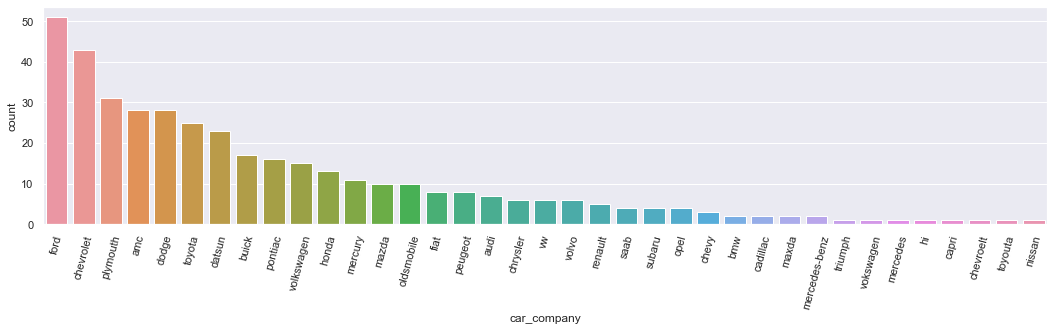

In [67]:
fig = plt.figure(1, (18, 4))

ax1 = plt.subplot(1,1,1)
sns.countplot(df_cats['car_company'], order=df_cats['car_company'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

plt.show()

In [73]:
df_cats['car_name'].value_counts()

num_rows, num_cols = df_cats.shape

car_name_perc = df_cats['car_name'].value_counts()/ num_rows
car_name_perc.round(2)

pinto         0.02
rabbit        0.01
maverick      0.01
corolla       0.01
matador       0.01
              ... 
monza 2+2     0.00
mustang ii    0.00
astro         0.00
pacer         0.00
s-10          0.00
Name: car_name, Length: 300, dtype: float64

In [74]:
df_cats['car_name'].value_counts()

pinto         6
rabbit        5
maverick      5
corolla       5
matador       5
             ..
monza 2+2     1
mustang ii    1
astro         1
pacer         1
s-10          1
Name: car_name, Length: 300, dtype: int64

In [75]:
df_new = pd.concat([df_cats,df_nums])

In [76]:
df_new

,origin,mpg_level,car_company,car_name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,usa,medium,chevrolet,chevelle malibu,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,usa,low,buick,skylark 320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,usa,medium,plymouth,satellite,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,usa,low,amc,rebel sst,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,usa,medium,ford,torino,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
393,NaN,NaN,NaN,NaN,27.0,4.0,140.0,86.0,2790.0,15.6,82.0
394,NaN,NaN,NaN,NaN,44.0,4.0,97.0,52.0,2130.0,24.6,82.0
395,NaN,NaN,NaN,NaN,32.0,4.0,135.0,84.0,2295.0,11.6,82.0
396,NaN,NaN,NaN,NaN,28.0,4.0,120.0,79.0,2625.0,18.6,82.0


In [77]:
df_cats

,origin,mpg_level,car_company,car_name
0,usa,medium,chevrolet,chevelle malibu
1,usa,low,buick,skylark 320
2,usa,medium,plymouth,satellite
3,usa,low,amc,rebel sst
4,usa,medium,ford,torino
...,...,...,...,...
393,usa,medium,ford,mustang gl
394,europe,high,vw,pickup
395,usa,high,dodge,rampage
396,usa,medium,ford,ranger


In [80]:
df_new = pd.concat((df_cats, df_nums), axis=1)
df_new.head()

,origin,mpg_level,car_company,car_name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,usa,medium,chevrolet,chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70
1,usa,low,buick,skylark 320,15.0,8,350.0,165.0,3693,11.5,70
2,usa,medium,plymouth,satellite,18.0,8,318.0,150.0,3436,11.0,70
3,usa,low,amc,rebel sst,16.0,8,304.0,150.0,3433,12.0,70
4,usa,medium,ford,torino,17.0,8,302.0,140.0,3449,10.5,70


In [81]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   origin        398 non-null    object 
 1   mpg_level     398 non-null    object 
 2   car_company   398 non-null    object 
 3   car_name      398 non-null    object 
 4   mpg           398 non-null    float64
 5   cylinders     398 non-null    int64  
 6   displacement  398 non-null    float64
 7   horsepower    398 non-null    float64
 8   weight        398 non-null    int64  
 9   acceleration  398 non-null    float64
 10  model_year    398 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 34.3+ KB


In [83]:
miss_val_df_new = df_new.isnull().sum()
miss_val_percent_df_new = 100 * df_new.isnull().sum() /len(df_new)
miss_val_table_df_new = pd.concat([miss_val_df_new,miss_val_percent_df_new],axis = 1)
miss_val_table_df_new = miss_val_table_df_new.rename(columns = {0 : 'Missing Values count', 1 : '% of Total Values'})
miss_val_table_df_new.sort_values("Missing Values count").round(2)

,Missing Values count,% of Total Values
origin,0,0.0
mpg_level,0,0.0
car_company,0,0.0
car_name,0,0.0
mpg,0,0.0
cylinders,0,0.0
displacement,0,0.0
horsepower,0,0.0
weight,0,0.0
acceleration,0,0.0


In [84]:
df_new.head()

,origin,mpg_level,car_company,car_name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,usa,medium,chevrolet,chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70
1,usa,low,buick,skylark 320,15.0,8,350.0,165.0,3693,11.5,70
2,usa,medium,plymouth,satellite,18.0,8,318.0,150.0,3436,11.0,70
3,usa,low,amc,rebel sst,16.0,8,304.0,150.0,3433,12.0,70
4,usa,medium,ford,torino,17.0,8,302.0,140.0,3449,10.5,70


In [85]:
df_cats.head()

,origin,mpg_level,car_company,car_name
0,usa,medium,chevrolet,chevelle malibu
1,usa,low,buick,skylark 320
2,usa,medium,plymouth,satellite
3,usa,low,amc,rebel sst
4,usa,medium,ford,torino


In [86]:
df_nums.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


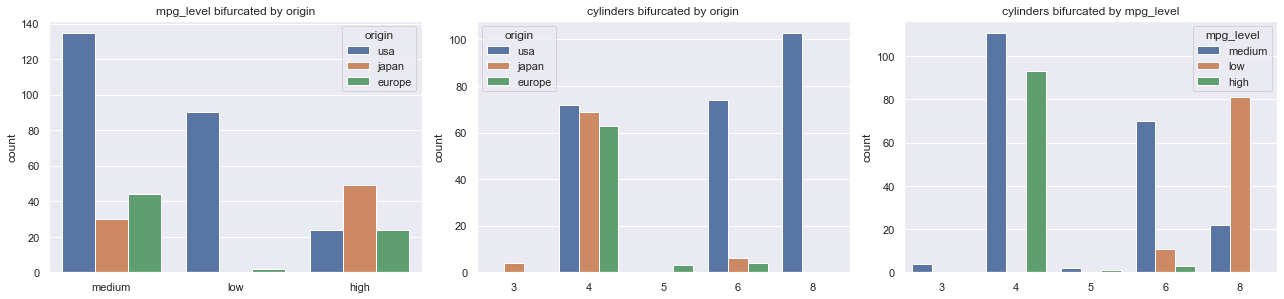

In [101]:
combos = itertools.combinations(['origin', 'mpg_level','cylinders'], 2)

fig = plt.figure(1, (18, 8))

i = 0
for pair in combos:

    i+=1
    ax = plt.subplot(2,3,i)
    sns.countplot(x=pair[1], hue=pair[0], data=df_new)
    ax.set_xlabel(None)
    ax.set_title(f'{pair[1]} bifurcated by {pair[0]}')
    plt.tight_layout()

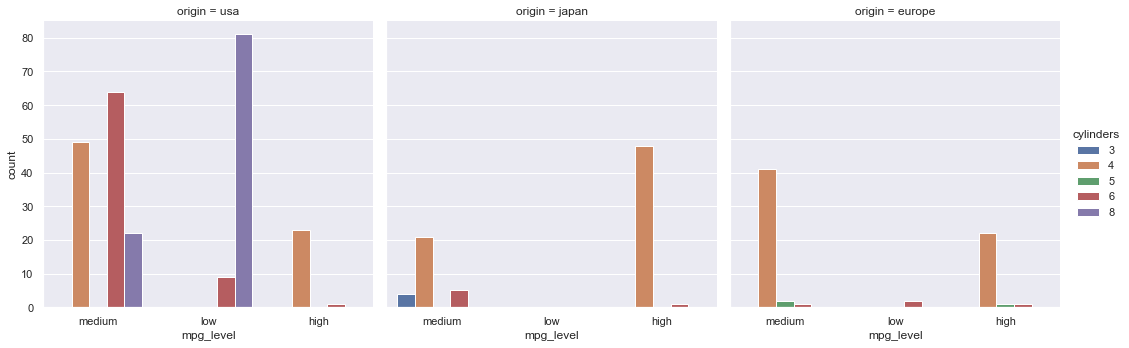

In [102]:
sns.catplot(x='mpg_level', hue='cylinders', col='origin', data=df_new, kind='count')
plt.show()

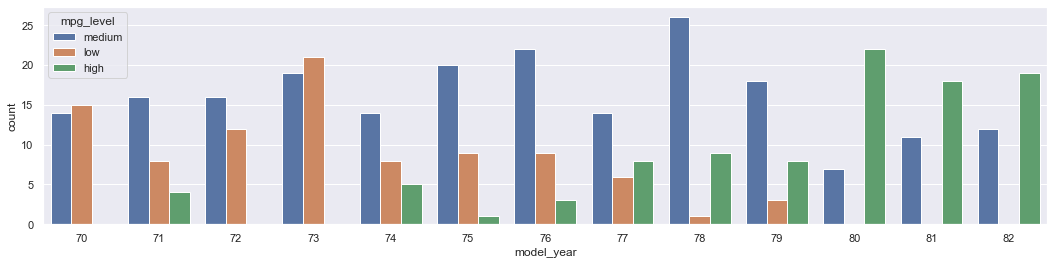

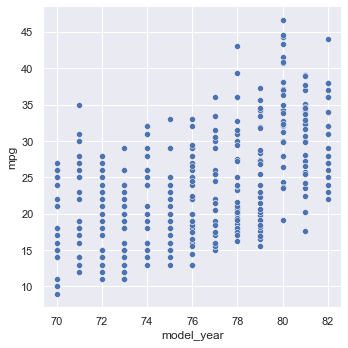

In [104]:
fig = plt.figure(1, (18,4))
sns.countplot(x='model_year', hue='mpg_level', data=df_new)
sns.relplot(x='model_year', y='mpg', data=df_new)
plt.show()

In [107]:
df_new_70 = df_new[df_new['model_year'] == 70]
df_new_70

,origin,mpg_level,car_company,car_name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,usa,medium,chevrolet,chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70
1,usa,low,buick,skylark 320,15.0,8,350.0,165.0,3693,11.5,70
2,usa,medium,plymouth,satellite,18.0,8,318.0,150.0,3436,11.0,70
3,usa,low,amc,rebel sst,16.0,8,304.0,150.0,3433,12.0,70
4,usa,medium,ford,torino,17.0,8,302.0,140.0,3449,10.5,70
5,usa,low,ford,galaxie 500,15.0,8,429.0,198.0,4341,10.0,70
6,usa,low,chevrolet,impala,14.0,8,454.0,220.0,4354,9.0,70
7,usa,low,plymouth,fury iii,14.0,8,440.0,215.0,4312,8.5,70
8,usa,low,pontiac,catalina,14.0,8,455.0,225.0,4425,10.0,70
9,usa,low,amc,ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70


In [108]:
df_new_82 = df_new[df_new['model_year'] == 82]
df_new_82

,origin,mpg_level,car_company,car_name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
367,usa,medium,chevrolet,cavalier,28.0,4,112.0,88.000000,2605,19.6,82
368,usa,medium,chevrolet,cavalier wagon,27.0,4,112.0,88.000000,2640,18.6,82
369,usa,high,chevrolet,cavalier 2-door,34.0,4,112.0,88.000000,2395,18.0,82
370,usa,high,pontiac,j2000 se hatchback,31.0,4,112.0,85.000000,2575,16.2,82
371,usa,medium,dodge,aries se,29.0,4,135.0,84.000000,2525,16.0,82
372,usa,medium,pontiac,phoenix,27.0,4,151.0,90.000000,2735,18.0,82
373,usa,medium,ford,fairmont futura,24.0,4,140.0,92.000000,2865,16.4,82
374,usa,medium,amc,concord dl,23.0,4,151.0,104.469388,3035,20.5,82
375,europe,high,volkswagen,rabbit l,36.0,4,105.0,74.000000,1980,15.3,82
376,japan,high,mazda,glc custom l,37.0,4,91.0,68.000000,2025,18.2,82


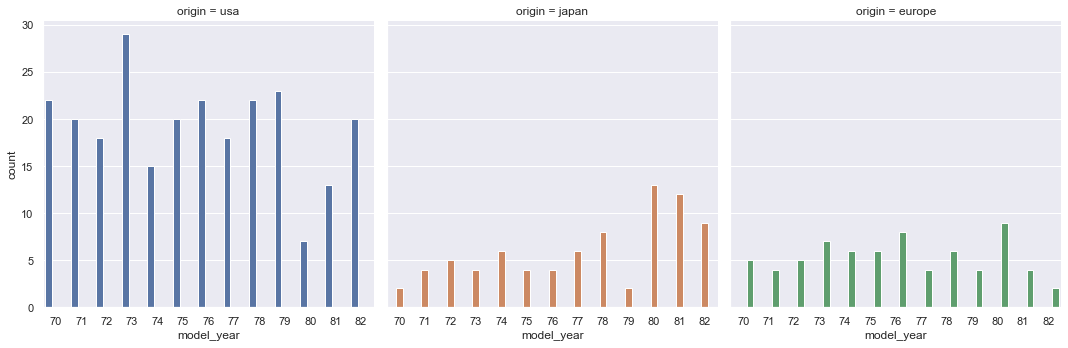

In [109]:
sns.catplot(x='model_year', hue='origin', col='origin', data=df_new, kind='count')
plt.show()

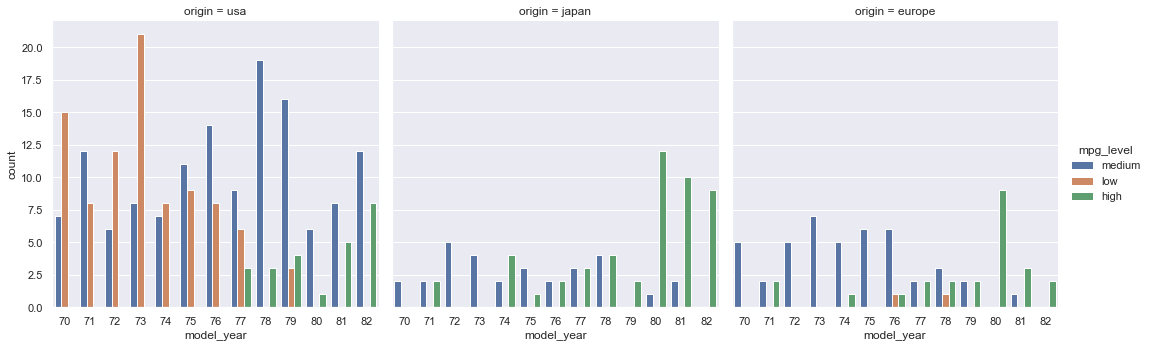

In [110]:
sns.catplot(x='model_year', hue='mpg_level', col='origin', data=df_new, kind='count')
plt.show()


In [111]:
top_car_companies = df_new.car_company.value_counts()[:15].index
top_car_companies

Index(['ford', 'chevrolet', 'plymouth', 'amc', 'dodge', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'mazda',
       'oldsmobile', 'fiat'],
      dtype='object')

In [112]:
df_new_top_comp = df_new[df_new.car_company.isin(top_car_companies)]
df_new_top_comp.shape

(329, 11)

In [113]:
df_new_top_comp

,origin,mpg_level,car_company,car_name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,usa,medium,chevrolet,chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70
1,usa,low,buick,skylark 320,15.0,8,350.0,165.0,3693,11.5,70
2,usa,medium,plymouth,satellite,18.0,8,318.0,150.0,3436,11.0,70
3,usa,low,amc,rebel sst,16.0,8,304.0,150.0,3433,12.0,70
4,usa,medium,ford,torino,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...,...,...,...,...
391,usa,high,dodge,charger 2.2,36.0,4,135.0,84.0,2370,13.0,82
392,usa,medium,chevrolet,camaro,27.0,4,151.0,90.0,2950,17.3,82
393,usa,medium,ford,mustang gl,27.0,4,140.0,86.0,2790,15.6,82
395,usa,high,dodge,rampage,32.0,4,135.0,84.0,2295,11.6,82


In [114]:
df_nums

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [117]:
df_nums.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.47,2970.42,15.57,76.01
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
25%,17.50,4.00,104.25,76.00,2223.75,13.82,73.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00
75%,29.00,8.00,262.00,125.00,3608.00,17.18,79.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


In [ ]:
for i in df_nums.columns:
    #plt.figure(figsize=(2,5))
    fig, axes = plt.subplots(rows, cols, figsize=(2,5))
    plt.title(i)
    sns.boxplot(data=df_nums[i])
  